In [327]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,  Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np# 元となる画像の読み込み
%matplotlib inline

In [328]:
# opencv画像入力用
from IPython.display import display, Image

def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))
    
# display_cv_image(bef_img, '.jpg')

In [329]:
# 元となる画像の読み込み
bef_img = cv2.imread( './img/bef.JPG', cv2.IMREAD_GRAYSCALE)
aft_img = cv2.imread('./img/aft.JPG', cv2.IMREAD_GRAYSCALE) 

In [380]:
width = 320
size = (3*width,4*width)
#Create Small Size Image
bef_img = cv2.resize(bef_img, size)
aft_img = cv2.resize(aft_img, size)

In [381]:
bef_dat = bef_img/255
aft_dat = aft_img/255
len(bef_dat[0])

960

# ニューラルネットを作成

In [382]:
NN = Sequential() #空のニューラルネット
NN.add(Dense(len(bef_dat[0]), input_dim=len(bef_dat[0])))
NN.add(Activation('sigmoid'))
NN.add(Dense(len(bef_dat[0])))
NN.add(Activation('softmax'))
NN.summary()
NN.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 960)               922560    
_________________________________________________________________
activation_75 (Activation)   (None, 960)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 960)               922560    
_________________________________________________________________
activation_76 (Activation)   (None, 960)               0         
Total params: 1,845,120
Trainable params: 1,845,120
Non-trainable params: 0
_________________________________________________________________


In [383]:
NN.fit(aft_dat, bef_dat, epochs=100)

Epoch 1/100
1280/1280 [==============================] - 2s - loss: 3389.4219 - acc: 0.0344     
Epoch 2/100
1280/1280 [==============================] - 1s - loss: 3380.3415 - acc: 0.0539     
Epoch 3/100
1280/1280 [==============================] - 1s - loss: 3375.8756 - acc: 0.0398     
Epoch 4/100
1280/1280 [==============================] - 1s - loss: 3374.1003 - acc: 0.0281     
Epoch 5/100
1280/1280 [==============================] - 1s - loss: 3373.2375 - acc: 0.0437     
Epoch 6/100
1280/1280 [==============================] - 1s - loss: 3372.8415 - acc: 0.0305     
Epoch 7/100
1280/1280 [==============================] - 1s - loss: 3372.6027 - acc: 0.0289     
Epoch 8/100
1280/1280 [==============================] - 1s - loss: 3372.4064 - acc: 0.0273     
Epoch 9/100
1280/1280 [==============================] - 1s - loss: 3372.2575 - acc: 0.0422     
Epoch 10/100
1280/1280 [==============================] - 1s - loss: 3372.1416 - acc: 0.0375     
Epoch 11/100
1280/1280 [=====

1280/1280 [==============================] - 1s - loss: 3371.1216 - acc: 0.1398     
Epoch 85/100
1280/1280 [==============================] - 1s - loss: 3371.1145 - acc: 0.1437     
Epoch 86/100
1280/1280 [==============================] - 1s - loss: 3371.1153 - acc: 0.1500      ETA
Epoch 87/100
1280/1280 [==============================] - 1s - loss: 3371.1156 - acc: 0.1422     
Epoch 88/100
1280/1280 [==============================] - 1s - loss: 3371.1146 - acc: 0.1469     
Epoch 89/100
1280/1280 [==============================] - 1s - loss: 3371.1167 - acc: 0.1531      ETA
Epoch 90/100
1280/1280 [==============================] - 1s - loss: 3371.1099 - acc: 0.1570     
Epoch 91/100
1280/1280 [==============================] - 1s - loss: 3371.1159 - acc: 0.1344     
Epoch 92/100
1280/1280 [==============================] - 1s - loss: 3371.1110 - acc: 0.1414     
Epoch 93/100
1280/1280 [==============================] - 1s - loss: 3371.1123 - acc: 0.1516     
Epoch 94/100
1280/1280 [=

In [401]:
result = NN.predict(aft_dat)
result = result*50000

In [402]:
#intに変換する.グレースケールはintだから
result = np.floor(result)
result = result.astype(np.int)

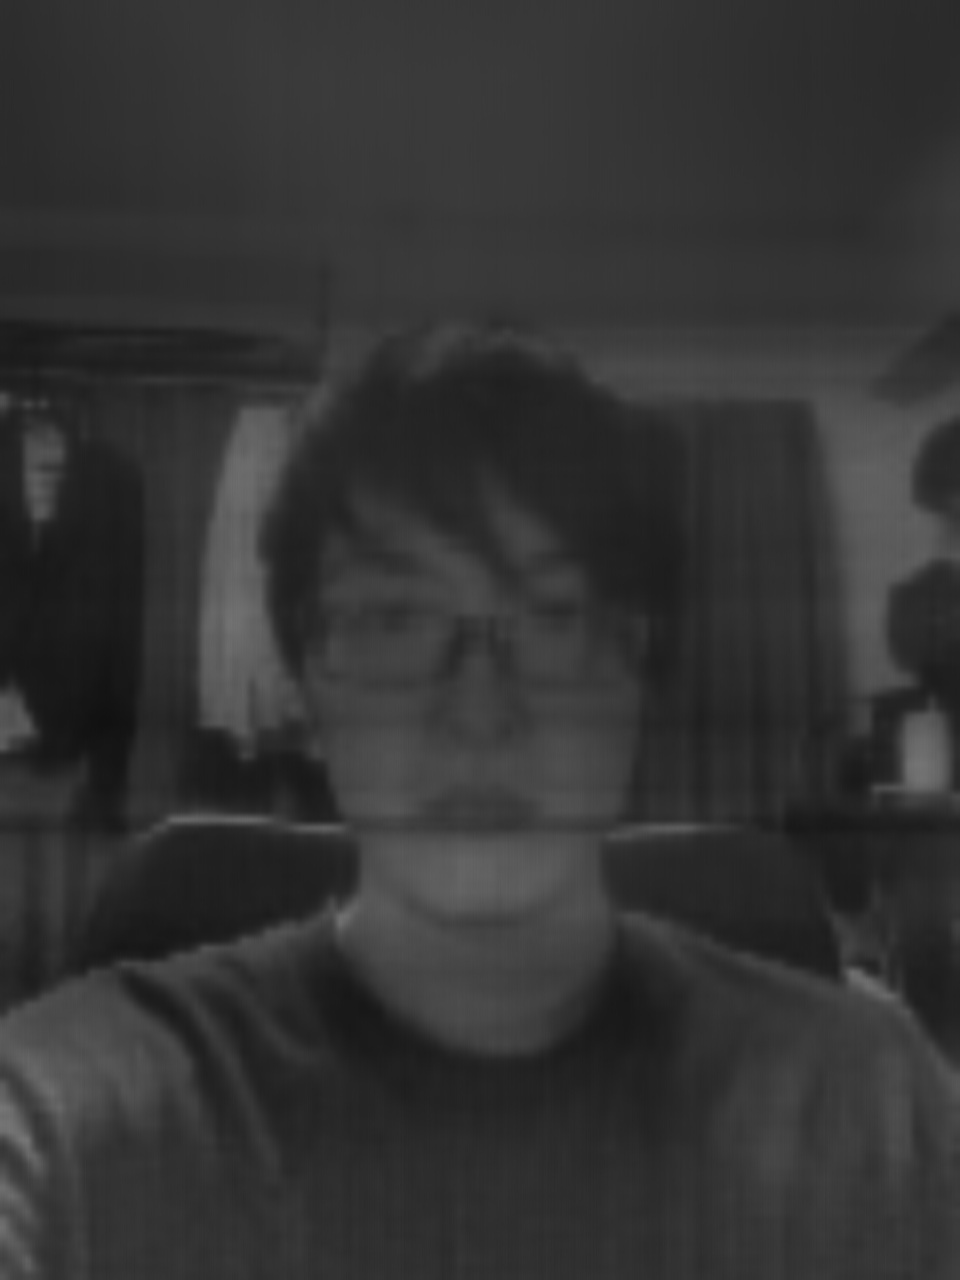

In [403]:
cv2.imwrite("./img/output.jpg", result)
# 元となる画像の読み込み
img = cv2.imread("./img/output.jpg")
display_cv_image(img)

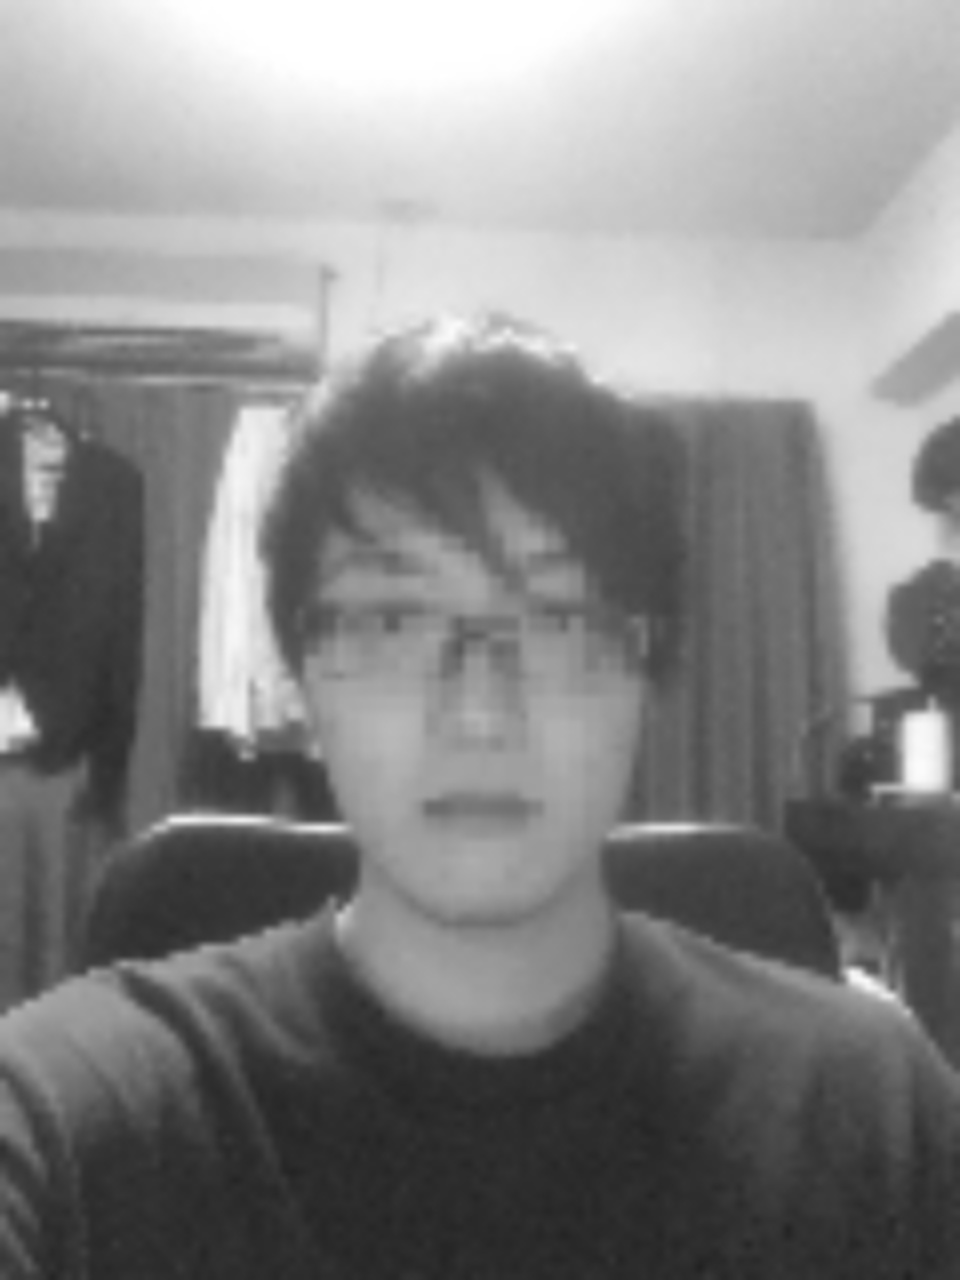

In [387]:
display_cv_image(aft_img)

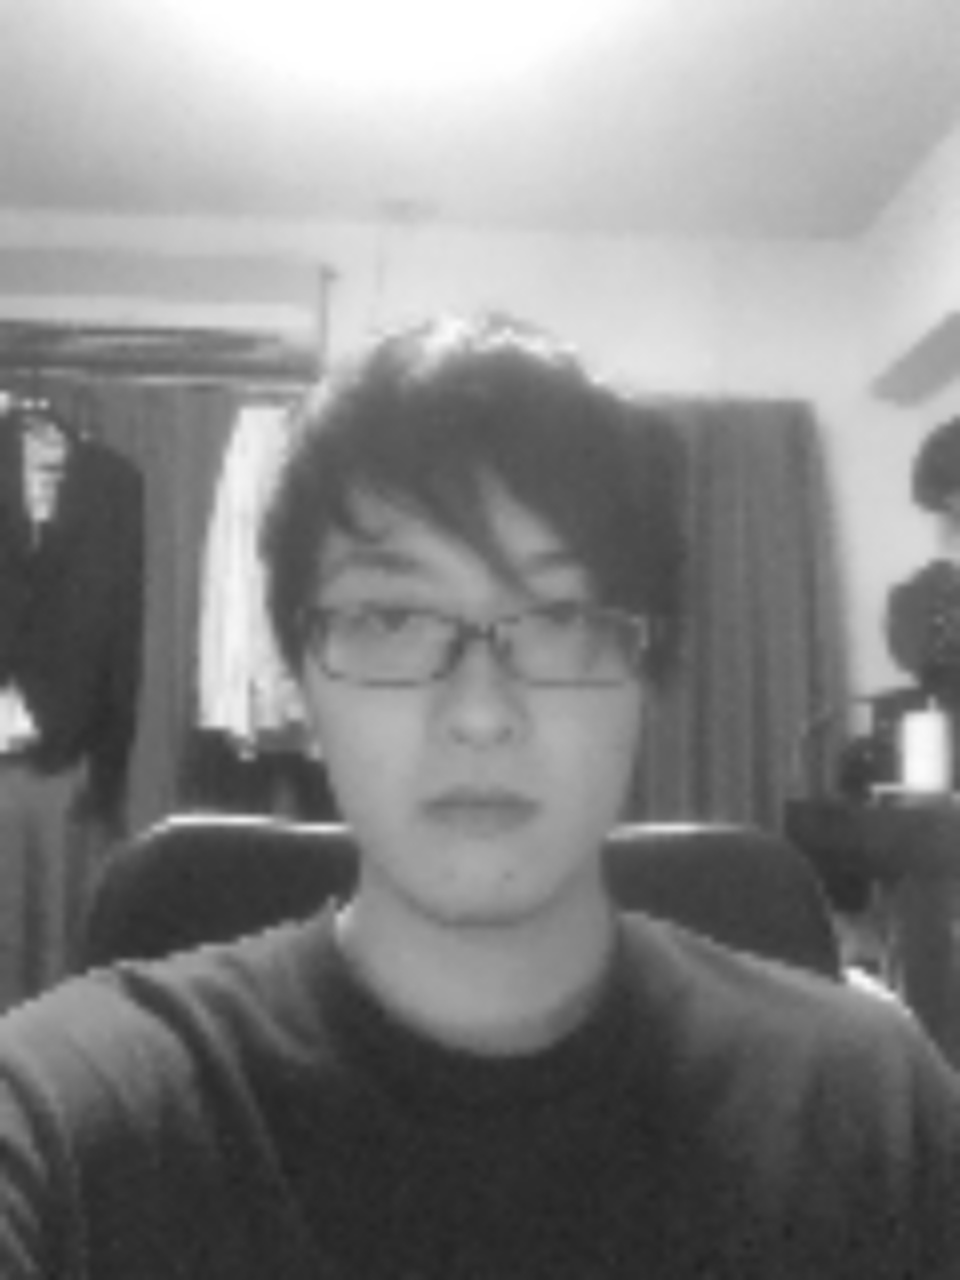

In [388]:
display_cv_image(bef_img)